## Using FacetGrid, catplot and lmplot

#### Building a FacetGrid
Seaborn's FacetGrid is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

For these exercises, we will continue to look at the College Scorecard Data from the US Department of Education. This rich dataset has many interesting data elements that we can plot with Seaborn.

When building a FacetGrid, there are two steps:

Create a FacetGrid object with columns, rows, or hue.
Map individual plots to the grid.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("college_datav3.TXT")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


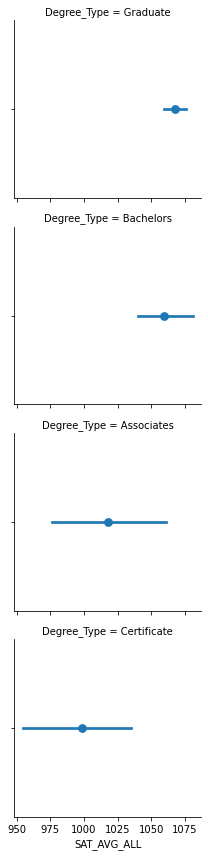

<Figure size 432x288 with 0 Axes>

In [10]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

Excellent job! This plots tell us a lot about the relationships between Average SAT scores by Degree Types offered at a university.

#### Using a catplot
In many cases, Seaborn's catplot() can be a simpler way to create a FacetGrid. Instead of creating a grid and mapping the plot, we can use the catplot() to create a plot with one line of code.

For this exercise, we will recreate one of the plots from the previous exercise using catplot() and show how to create a boxplot on a data-aware grid.

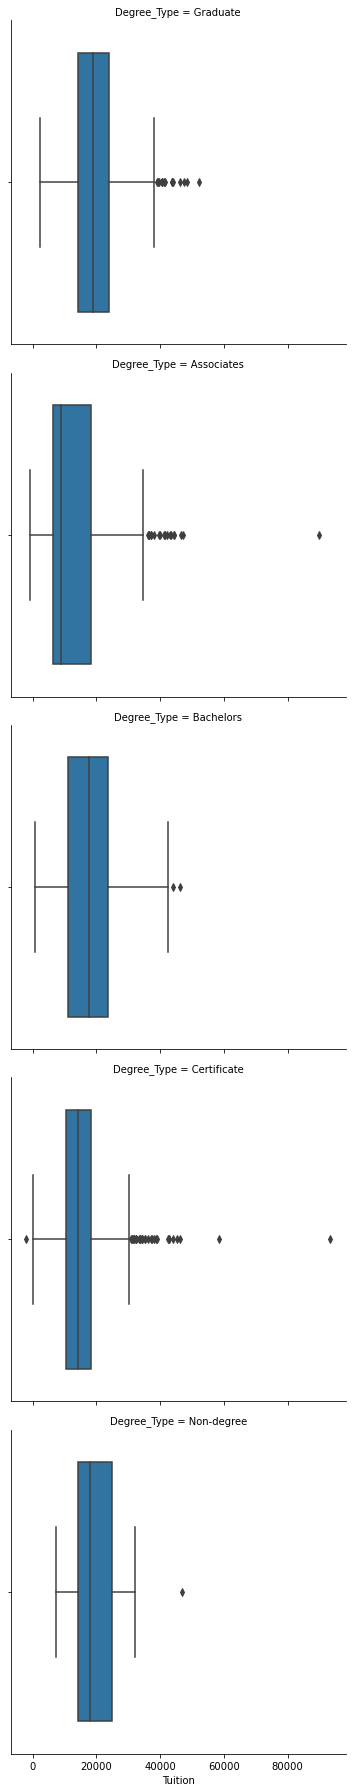

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


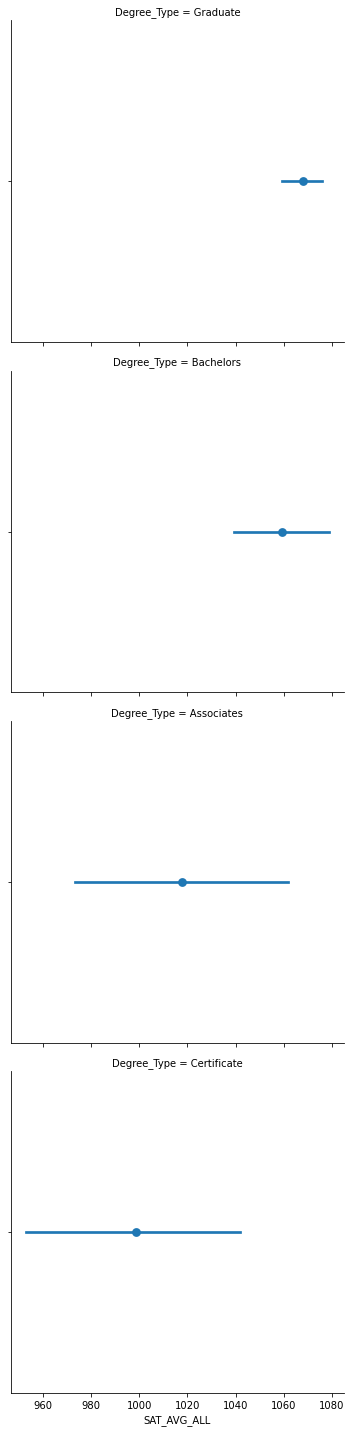

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

The catplot is often more convenient than using a FacetGrid for creating data aware grids.

#### Using a lmplot
The lmplot is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to catplot with the difference that the default behavior of lmplot is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate population (UG) and compare it to the percentage of students receiving Pell Grants (PCTPELL).

For the second lmplot exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

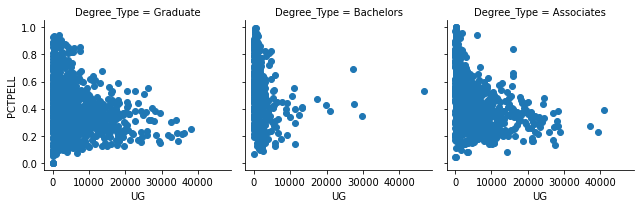

<Figure size 432x288 with 0 Axes>

In [17]:
degree_ord = ["Graduate","Bachelors","Associates"]

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

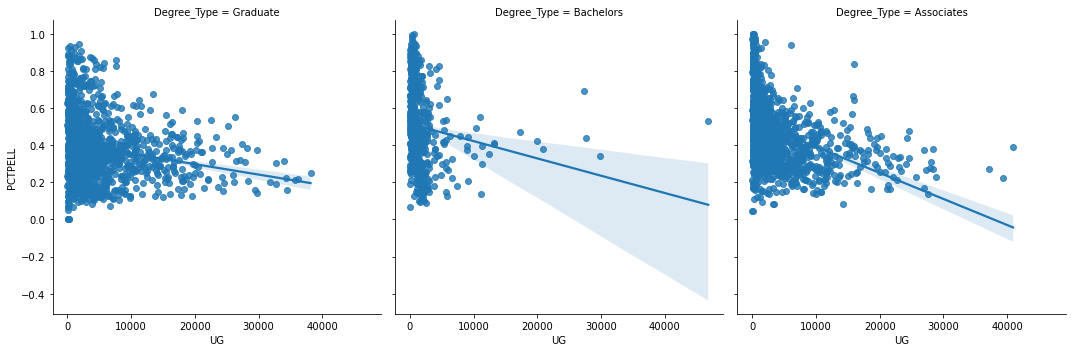

<Figure size 432x288 with 0 Axes>

In [18]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

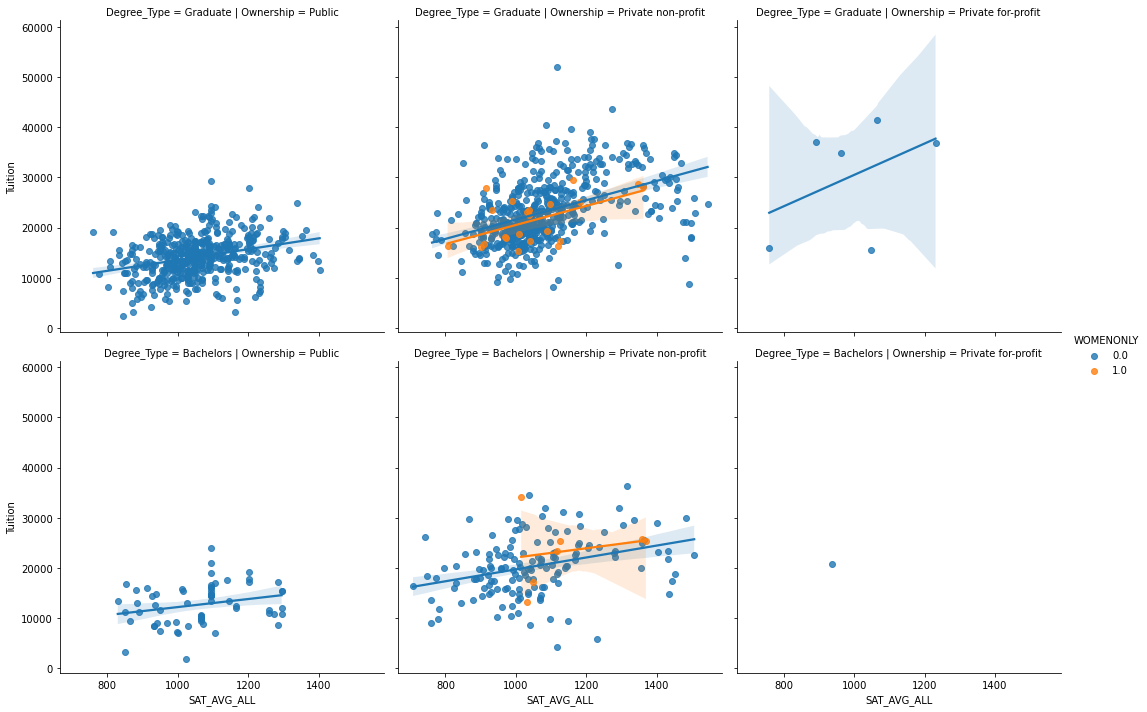

<Figure size 432x288 with 0 Axes>

In [20]:

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        )

plt.show()
plt.clf()

Great job! Creating small multiples of plots is very useful for many types of analysis. With Seaborn, it is easy to use the plot types to quickly perform complex visualizations.

## Using PairGrid and pairplot
#### Building a PairGrid
When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.

Seaborn supports this pair-wise analysis using the PairGrid. In this exercise, we will look at the Car Insurance Premium data we analyzed in Chapter 1. All data is available in the df variable.

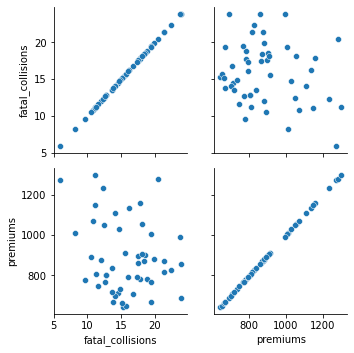

<Figure size 432x288 with 0 Axes>

In [22]:
df = pd.read_csv("insurance_premiums.TXT")

# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(sns.scatterplot)

plt.show()
plt.clf()

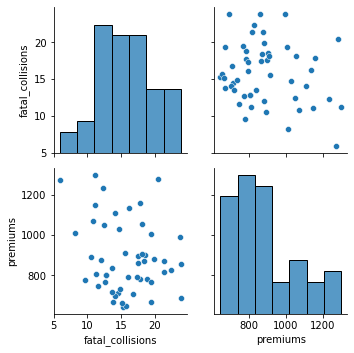

<Figure size 432x288 with 0 Axes>

In [23]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()
plt.clf()

This analysis provides useful insight into the distribution of premium amounts as well as the limited relationships between fatal_collision and premiums.

#### Using a pairplot
The pairplot() function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the PairGrid using less code. Then, we will explore some additional functionality of the pairplot(). We will also use a different palette and adjust the transparency of the diagonal plots using the alpha parameter.

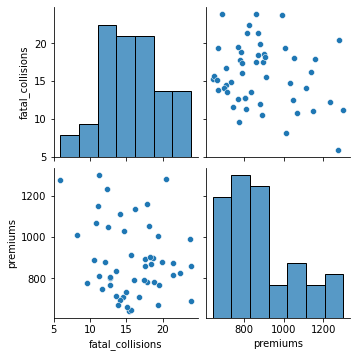

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter')

plt.show()
plt.clf()

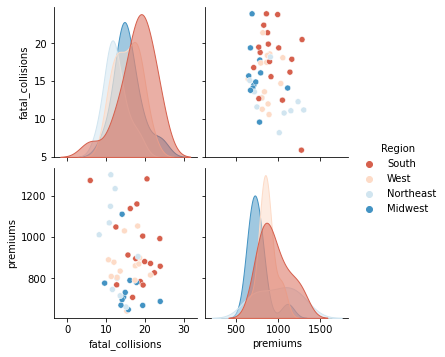

<Figure size 432x288 with 0 Axes>

In [25]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter',
             hue='Region',
             palette='RdBu',
             diag_kws={'alpha':.5})

plt.show()
plt.clf()

Good job! The pairplot is generally a simpler than PairGrid for plotting complex relationships

#### Additional pairplots
This exercise will go through a couple of more examples of how the pairplot() can be customized for quickly analyzing data and determining areas of interest that might be worthy of additional analysis.

One area of customization that is useful is to explicitly define the x_vars and y_vars that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

We have already looked at using kind to control the types of plots. We can also use diag_kind to control the types of plots shown on the diagonals. In the final example, we will include a regression and kde plot in the pairplot.

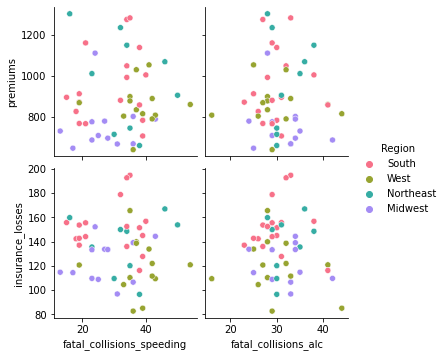

<Figure size 432x288 with 0 Axes>

In [26]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
             x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
             y_vars=['premiums', 'insurance_losses'],
             kind='scatter',
             hue='Region',
             palette='husl')

plt.show()
plt.clf()

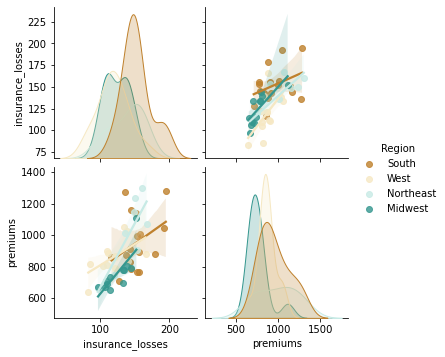

<Figure size 432x288 with 0 Axes>

In [27]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

## Using JointGrid and jointplot

#### Building a JointGrid and jointplot
Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. The process for creating these plots should be familiar to you now. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

For these exercises, we will use the bike share data that we reviewed earlier. In this exercise, we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.


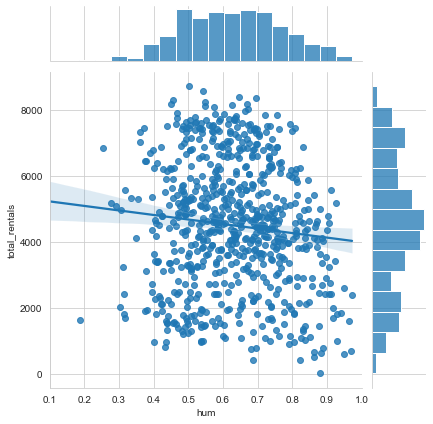

<Figure size 432x288 with 0 Axes>

In [29]:
df = pd.read_csv("bike_share.TXT")

# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
                  y="total_rentals",
                  data=df,
                  xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()

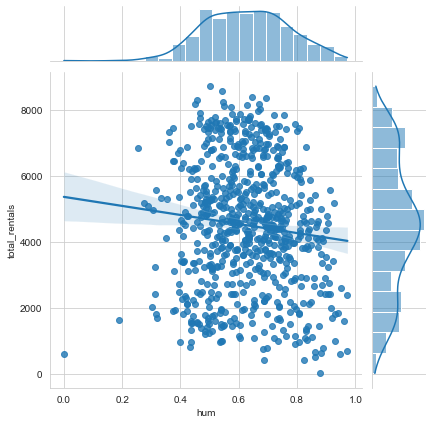

<Figure size 432x288 with 0 Axes>

In [30]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x="hum",
              y="total_rentals",
              kind='reg',
              data=df)

plt.show()
plt.clf()

Good job. These plots show that there is limited relationship between rental amounts and humidity levels.

#### Jointplots and regression
Since the previous plot does not show a relationship between humidity and rental amounts, we can look at another variable that we reviewed earlier. Specifically, the relationship between temp and total_rentals.

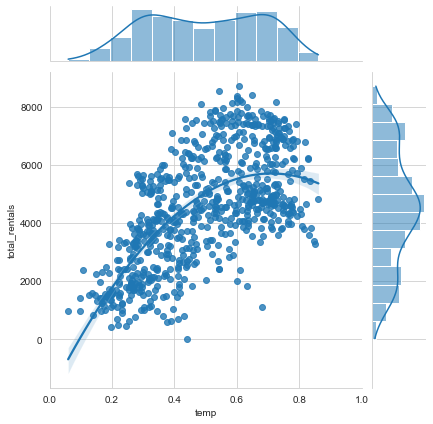

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
              y="total_rentals",
              kind='reg',
              data=df,
              order=2,
              xlim=(0, 1))

plt.show()
plt.clf()

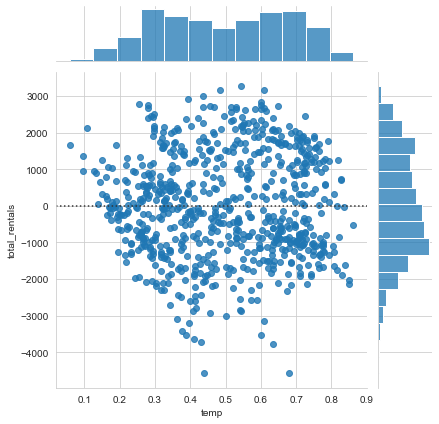

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
              y="total_rentals",
              kind='resid',
              data=df,
              order=2)

plt.show()
plt.clf()

Based on the residual plot and the pearson r value, there is a positive relationship between temperature and total_rentals.

#### Complex jointplots
The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

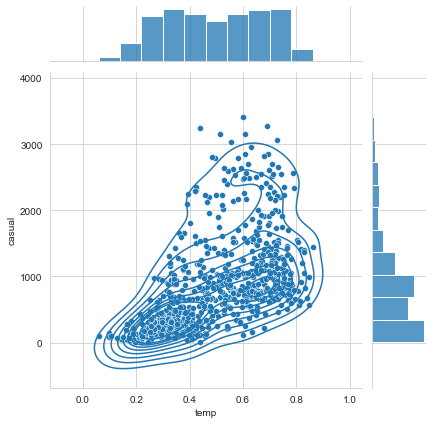

<Figure size 432x288 with 0 Axes>

In [33]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x="temp",
                   y="casual",
                   kind='scatter',
                   data=df,
                   marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()

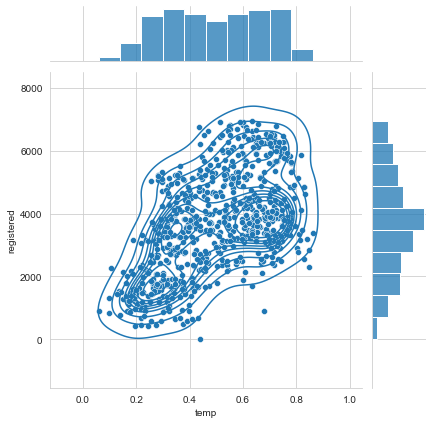

<Figure size 432x288 with 0 Axes>

In [34]:
# Replicate the previous plot but only for registered riders
g = sns.jointplot(x="temp",
                   y="registered",
                   kind='scatter',
                   data=df,
                   marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()

Congratulations. You have successfully visualized multiple data relationships in the bike sharing data!